# Hướng dẫn cơ bản về Julia

### Sử dụng hàm toán học có sẵn trong Julia

### Lập các hàm số trong Julia

### Vec tơ, hàm của vec tơ

Một vec tơ được đặt trong dấu ngoặc vuông. Như ở bài tập khối siêu cầu, ta đã có vec tơ `[xđ yđ zđ uđ]`. 

Vec tơ có thể có ý nghĩa hình học, hoặc chỉ đơn thuần là một dãy các số có xếp thứ tự. 

Hàm số có thể nhận tham số là vec tơ. Chẳng hạn hàm tính tổng `sum`, hoặc hàm `norm` ở bài tập siêu cầu. 

In [12]:
sum([2,3,4,5])

14

In [1]:
function tích(V)
    t = 1
    for v in V
        t *= v
    end
    t
end

tích([2,3,4])

24

Một kiểu số liệu nữa là dãy số, ta đã gặp ở vòng lặp `for`. Dãy số có thể dùng ở nhiều phép tính thay cho vec tơ, nhưng chúng không giống nhau.

In [7]:
X = 1:5
Y = [1,2,3,4,5]
X == Y

false

Một dạng quan trọng của hàm số đối với vec tơ là nhận một vec tơ và thực hiện phép tính với từng phần tử của vec tơ đó. Chẳng hạn:

In [11]:
abs([-5,3,8.4,-1.87])

4-element Array{Float64,1}:
 5.0 
 3.0 
 8.4 
 1.87

In [6]:
sqrt(X)

5-element Array{Float64,1}:
 1.0    
 1.41421
 1.73205
 2.0    
 2.23607

Một tình huống thường gặp là cần áp dụng của hàm tự viết cho tham số là 1 vec tơ thay vì một số. Thông thường, nếu nội dung của hàm này chỉ có phép tính đơn giản thì có thể gọi hàm được. Chẳng hạn một hàm vận tốc dòng chảy qua lỗ trên bình chứa:
$$ v = \phi \sqrt{2gH} $$

In [2]:
vận_tốc(H) = 0.63*sqrt(9.81H)
V = vận_tốc([1,1.2,1.8,2.4])

4-element Array{Float64,1}:
 1.97322
 2.16155
 2.64735
 3.0569 

Nhưng nếu hàm phức tạp có các lệnh lặp và lệnh điều kiện (như ta thường gặp trong các bài toán kĩ thuật) thì cách làm trên lại không được. Chẳng hạn, để giải biểu thức phân tán sóng:

$$ L = L_0 \tanh (2\pi h/L) $$

ta cần viết một hàm tính lặp:

In [3]:
function tính_L(L₀, h)
    L = L₀
    sai_số = Inf
    while sai_số > 0.00001
        L₁ = L₀ * tanh(2π*h/L)
        sai_số = abs(L₁ - L)/L
        L = L₁
    end
    L
end

tính_L(100,5)

53.10377348111278

Nhưng để áp dụng cho một vec tơ gía trị của $h$ thì có vấn đề:

In [4]:
L = tính_L(100,[2,4,7,10])

LoadError: `isless` has no method matching isless(::Float64, ::Array{Float64,1})
while loading In[4], in expression starting on line 1

Để khắc phục được điều này người ta dùng cách viết như sau:

In [5]:
L = [tính_L(100, hᵢ) for hᵢ in [2,5,7,10]]

4-element Array{Union(Int64,Float64),1}:
 34.7054
 53.1038
 61.4361
 70.932 

Cách viết này giống trong toán học: 
$$ \{ f(x) | x \in S \} $$

### Vẽ đồ thị hàm số 

Trước hết, cần một lệnh yêu cầu sử dụng gói phần mềm phục vụ vẽ đồ thị. Lưu ý rằng trong JuliaBox, có thể phải chọn phiên bản Julia cũ (0.3.x) mới vẽ được.

In [7]:
using PyPlot

INFO: Loading help data...


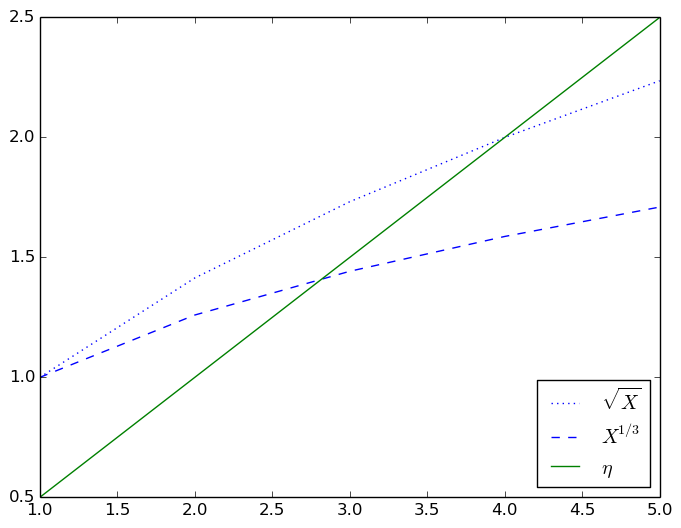

PyObject <matplotlib.legend.Legend object at 0x7f74e62cb550>

In [22]:
X = 1:5

plot(X,sqrt(X), linestyle=":") 
plot(X,X.^(1/3), linestyle="--", color="blue") 
plot(X,0.5X)

legend([L"\sqrt{X}", L"X^{1/3}", L"\eta"], loc=4)